In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Исследуем датасет со стоимостью юаней и золота

Прочитаем данные из csv файла, полученного на предыдущем этапе:



In [ ]:
cny_gold_prices = pd.read_csv('/content/cny_rub_dataset (5).csv')
cny_gold_prices

,currency,price_rub,timestamp,gold_price,trading_status_cny,trading_status_gold
0,CNY,17.6900,1646290800,6740.00,NaN,NaN
1,CNY,18.1499,1646292600,6899.99,NaN,NaN
2,CNY,18.7400,1646294400,6999.00,NaN,NaN
3,CNY,18.6800,1646296200,7056.40,NaN,NaN
4,CNY,18.5400,1646298000,7056.00,NaN,NaN
...,...,...,...,...,...,...
17044,CNY,12.1515,1740751200,8180.00,NaN,NaN
17045,CNY,12.1785,1740753000,8176.80,NaN,NaN
17046,CNY,12.1600,1740754800,8179.60,NaN,NaN
17047,CNY,12.1230,1740756600,8168.50,NaN,NaN


In [ ]:
cny_gold_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17049 entries, 0 to 17048
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   currency             17049 non-null  object 
 1   price_rub            17049 non-null  float64
 2   timestamp            17049 non-null  int64  
 3   gold_price           16958 non-null  float64
 4   trading_status_cny   1 non-null      object 
 5   trading_status_gold  1 non-null      object 
dtypes: float64(2), int64(1), object(3)
memory usage: 799.3+ KB




*   currency - код ISO юаня
*   price_rub - исторические данные о значениях юаня к рублю
*   timestamp - временная метка в формате UNIX
*   gold_price - исторические данные о цене золота (в рублях за 1 грамм)
*   trading_status_cny и trading_status_gold - текущий статус торгов для CNY и золота соответсвенно (указан только на актульную дату)







Переведем временную метку из UNIX формата в удобочитаемый вид и также добавим столбец с датой:

In [ ]:
cny_gold_prices['datetime'] = pd.to_datetime(cny_gold_prices['timestamp'], unit='s')
cny_gold_prices['date'] = cny_gold_prices['datetime'].dt.date
cny_gold_prices['date'] = pd.to_datetime(cny_gold_prices['date'])
cny_gold_prices.head()

,currency,price_rub,timestamp,gold_price,trading_status_cny,trading_status_gold,datetime,date
0,CNY,17.6900,1646290800,6740.00,NaN,NaN,2022-03-03 07:00:00,2022-03-03
1,CNY,18.1499,1646292600,6899.99,NaN,NaN,2022-03-03 07:30:00,2022-03-03
2,CNY,18.7400,1646294400,6999.00,NaN,NaN,2022-03-03 08:00:00,2022-03-03
3,CNY,18.6800,1646296200,7056.40,NaN,NaN,2022-03-03 08:30:00,2022-03-03
4,CNY,18.5400,1646298000,7056.00,NaN,NaN,2022-03-03 09:00:00,2022-03-03


В датасете содержатся данные о курсах юаня и золота за каждые 30 минут в рабочее время биржи с 03.03.2022 по 28.02.2025

Уберем столбцы, которые не несут полезной информации, и переименуем полезные:

In [ ]:
cny_gold_prices.drop(columns=['currency', 'trading_status_cny', 'trading_status_gold', 'timestamp'], inplace=True)
cny_gold_prices.rename(columns={'price_rub': 'cny_price_rub', 'gold_price': 'gold_price_rub'}, inplace=True)
cny_gold_prices

,cny_price_rub,gold_price_rub,datetime,date
0,17.6900,6740.00,2022-03-03 07:00:00,2022-03-03
1,18.1499,6899.99,2022-03-03 07:30:00,2022-03-03
2,18.7400,6999.00,2022-03-03 08:00:00,2022-03-03
3,18.6800,7056.40,2022-03-03 08:30:00,2022-03-03
4,18.5400,7056.00,2022-03-03 09:00:00,2022-03-03
...,...,...,...,...
17044,12.1515,8180.00,2025-02-28 14:00:00,2025-02-28
17045,12.1785,8176.80,2025-02-28 14:30:00,2025-02-28
17046,12.1600,8179.60,2025-02-28 15:00:00,2025-02-28
17047,12.1230,8168.50,2025-02-28 15:30:00,2025-02-28


Также уберем последнюю строку тк она появилась из-за ненужных столбцов 'trading_status_cny' и 'trading_status_gold':

In [ ]:
cny_gold_prices.drop(cny_gold_prices.index[-1], inplace=True)
cny_gold_prices

,cny_price_rub,gold_price_rub,datetime,date
0,17.6900,6740.00,2022-03-03 07:00:00,2022-03-03
1,18.1499,6899.99,2022-03-03 07:30:00,2022-03-03
2,18.7400,6999.00,2022-03-03 08:00:00,2022-03-03
3,18.6800,7056.40,2022-03-03 08:30:00,2022-03-03
4,18.5400,7056.00,2022-03-03 09:00:00,2022-03-03
...,...,...,...,...
17043,12.1775,8191.10,2025-02-28 13:30:00,2025-02-28
17044,12.1515,8180.00,2025-02-28 14:00:00,2025-02-28
17045,12.1785,8176.80,2025-02-28 14:30:00,2025-02-28
17046,12.1600,8179.60,2025-02-28 15:00:00,2025-02-28


In [ ]:
cny_gold_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cny_price_rub   17048 non-null  float64       
 1   gold_price_rub  16957 non-null  float64       
 2   datetime        17048 non-null  datetime64[ns]
 3   date            17048 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2)
memory usage: 532.9 KB


In [ ]:
cny_gold_prices[cny_gold_prices['gold_price_rub'].isnull()]

,cny_price_rub,gold_price_rub,datetime,date
10,18.8100,NaN,2022-03-03 12:00:00,2022-03-03
195,16.4364,NaN,2022-03-21 14:30:00,2022-03-21
209,16.4184,NaN,2022-03-22 12:30:00,2022-03-22
221,16.3700,NaN,2022-03-23 09:30:00,2022-03-23
360,13.2501,NaN,2022-04-04 06:30:00,2022-04-04
...,...,...,...,...
2869,8.1990,NaN,2022-10-05 03:30:00,2022-10-05
2894,8.5520,NaN,2022-10-06 03:30:00,2022-10-06
4668,10.1500,NaN,2023-01-17 03:30:00,2023-01-17
9589,12.7300,NaN,2023-10-26 03:30:00,2023-10-26


Видим, что в столбце с иторическими данными о золоте есть 91 пропуск. При решении нашей задачи они особо не мешают, поэтому оставим все как есть.

Провизуализируем данные:

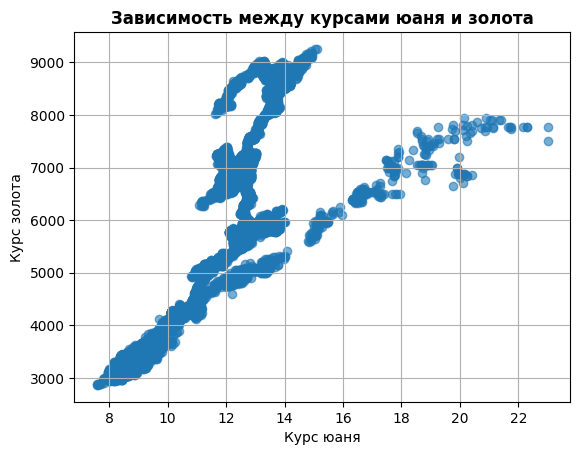

In [ ]:
plt.scatter(cny_gold_prices['cny_price_rub'], cny_gold_prices['gold_price_rub'], alpha=0.6)
plt.title('Зависимость между курсами юаня и золота', fontweight='bold')
plt.xlabel('Курс юаня')
plt.ylabel('Курс золота')
plt.grid()
plt.show()

Видим на графике 2 линейные тенденции, попробуем их объяснить:

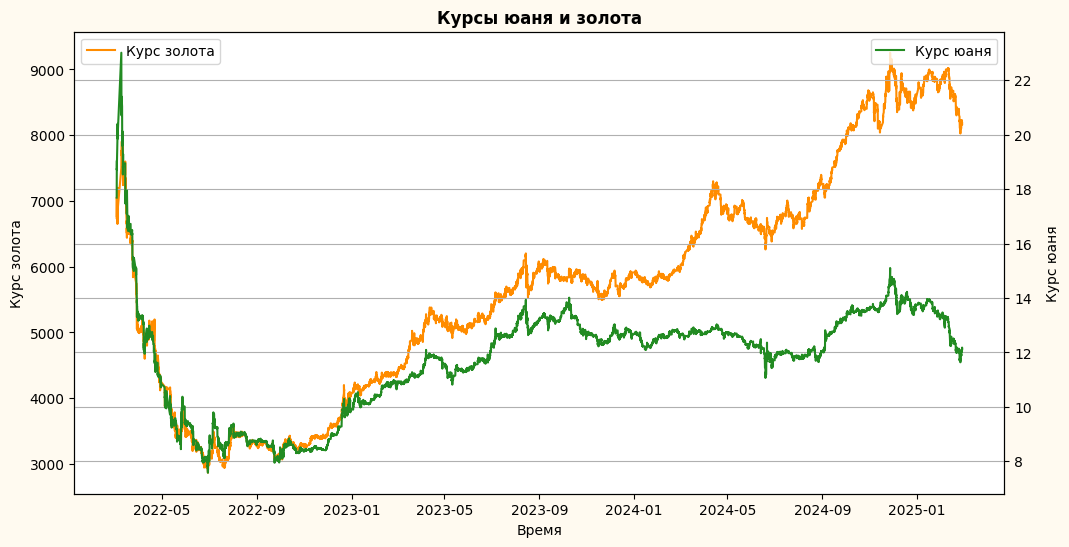

In [ ]:
plt.figure(figsize=(12, 6), facecolor='floralwhite')

sns.lineplot(data=cny_gold_prices, x='datetime', y='gold_price_rub', color='darkorange', label='Курс золота')
plt.title('Курсы юаня и золота', fontweight='bold')
plt.xlabel('Время')
plt.ylabel('Курс золота')
plt.tick_params(axis='y')

ax2 = plt.gca().twinx()
sns.lineplot(data=cny_gold_prices, x='datetime', y='cny_price_rub', color='forestgreen', label='Курс юаня', ax=ax2)
ax2.set_ylabel('Курс юаня', labelpad=10)
ax2.tick_params(axis='y')
plt.grid()
plt.show()

Из графика видим, что золото и юань очень сильно коррелируют примерно до начала 2023 года, а потом корреляция между ними становится чуть меньше. Скорее всего именно этим объясняются 2 линейные тенденции на прошлом графике: они соответсвуют разным отрезкам времени. Визуализируем это:

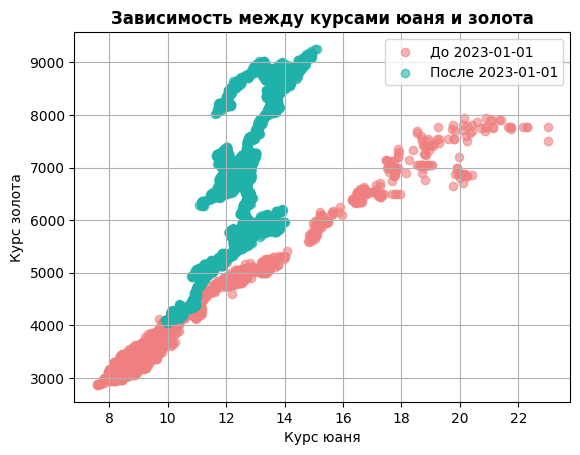

In [ ]:
before_2023 = cny_gold_prices[cny_gold_prices['date'] < '2023-01-01']
after_2023 = cny_gold_prices[cny_gold_prices['date'] >= '2023-01-01']

plt.scatter(before_2023['cny_price_rub'], before_2023['gold_price_rub'], color='lightcoral', label='До 2023-01-01', alpha=0.6)
plt.scatter(after_2023['cny_price_rub'], after_2023['gold_price_rub'], color='lightseagreen', label='После 2023-01-01', alpha=0.6)
plt.title('Зависимость между курсами юаня и золота', fontweight='bold')
plt.xlabel('Курс юаня')
plt.ylabel('Курс золота')
plt.legend()
plt.grid()
plt.show()

Предположение подтвердилось.

Теперь попробуем ответить на вопрос, в какое время дня чаще всего юань и золото достигают своего максимального или манимального курса за день, ведь эти данные можно использовать, чтобы предсказывать, когда выгоднее купить/продать юань/золото в течение дня:

In [ ]:
cny_gold_prices['time'] = cny_gold_prices['datetime'].dt.time

daily_max = cny_gold_prices.groupby(['date'])['cny_price_rub'].max().reset_index()

cny_max_times = cny_gold_prices.merge(daily_max, on=['date', 'cny_price_rub'])

max_counts = cny_max_times['time'].value_counts().sort_index()

total_counts = cny_gold_prices['time'].value_counts().sort_index()

max_to_total_ratio = max_counts / total_counts

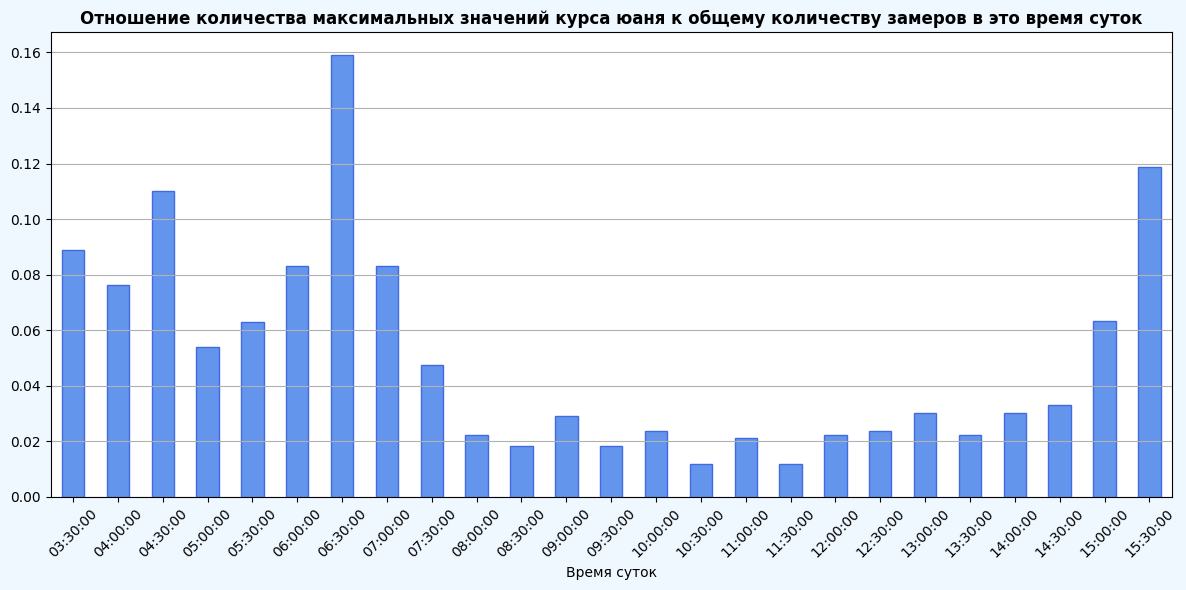

In [ ]:
plt.figure(figsize=(12, 6), facecolor='aliceblue')
max_to_total_ratio.plot(kind='bar', color='cornflowerblue', edgecolor='royalblue')
plt.title('Отношение количества максимальных значений курса юаня к общему количеству замеров в это время суток', fontweight='bold')
plt.xlabel('Время суток')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Аналогичный график построим для минимума юаня:

In [ ]:
daily_min = cny_gold_prices.groupby(['date'])['cny_price_rub'].min().reset_index()

cny_min_times = cny_gold_prices.merge(daily_min, on=['date', 'cny_price_rub'])

min_counts = cny_min_times['time'].value_counts().sort_index()

total_counts = cny_gold_prices['time'].value_counts().sort_index()

min_to_total_ratio = min_counts / total_counts

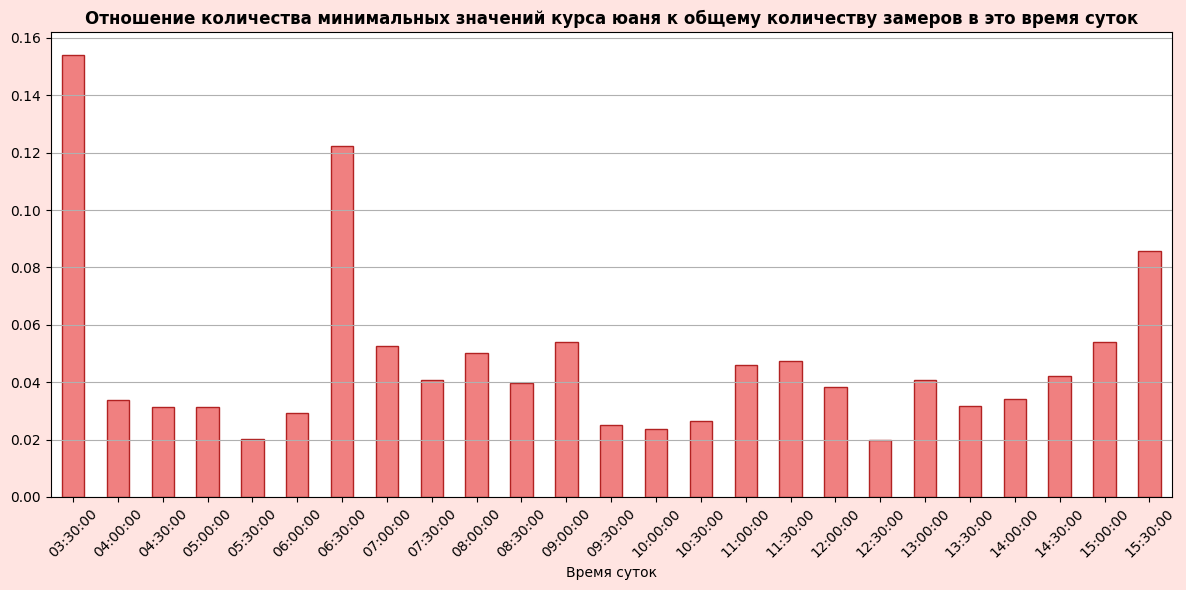

In [ ]:
plt.figure(figsize=(12, 6), facecolor='mistyrose')
min_to_total_ratio.plot(kind='bar', color='lightcoral', edgecolor='firebrick')
plt.title('Отношение количества минимальных значений курса юаня к общему количеству замеров в это время суток', fontweight='bold')
plt.xlabel('Время суток')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Из графиков выше можем сделать вывод, что чаще всего юань достигает своего минимума за день в 3:30, а максимума - в 6:30. Эти данные можно попробовать использовать, чтобы угадывать время суток, когда наиболее выгодно продать или купить юань.

Теперь аналогичные графики построим для золота, но для начала здесь все-таки уберем пропуски:

In [ ]:
cny_gold_prices_won.dropna(subset=['gold_price_rub'], inplace=True)
cny_gold_prices_won.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16957 entries, 0 to 17047
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cny_price_rub   16957 non-null  float64       
 1   gold_price_rub  16957 non-null  float64       
 2   datetime        16957 non-null  datetime64[ns]
 3   date            16957 non-null  datetime64[ns]
 4   time            16957 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 1.3+ MB


In [ ]:
daily_max_gold = cny_gold_prices_won.groupby(['date'])['gold_price_rub'].max().reset_index()

cny_max_gold_times = cny_gold_prices_won.merge(daily_max_gold, on=['date', 'gold_price_rub'])

max_gold_counts = cny_max_gold_times['time'].value_counts().sort_index()

total_gold_counts = cny_gold_prices_won['time'].value_counts().sort_index()

max_to_total_gold_ratio = max_gold_counts / total_gold_counts

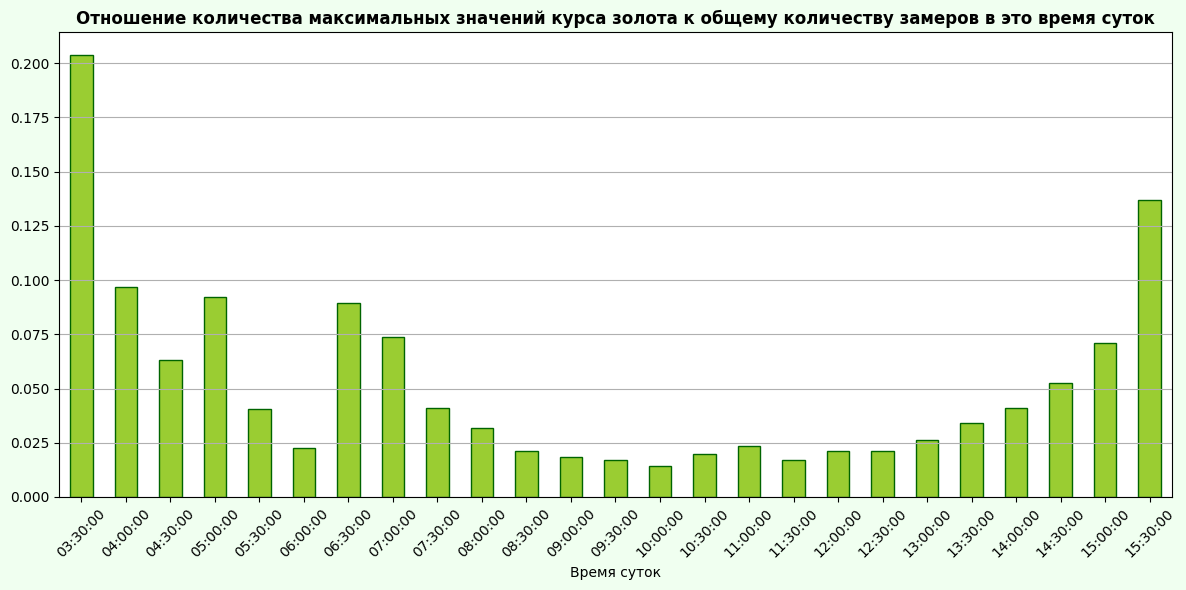

In [ ]:
plt.figure(figsize=(12, 6), facecolor='honeydew')
max_to_total_gold_ratio.plot(kind='bar', color='yellowgreen', edgecolor='darkgreen')
plt.title('Отношение количества максимальных значений курса золота к общему количеству замеров в это время суток', fontweight='bold')
plt.xlabel('Время суток')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Аналогично для минимума:

In [ ]:
daily_min_gold = cny_gold_prices_won.groupby(['date'])['gold_price_rub'].min().reset_index()

cny_min_gold_times = cny_gold_prices_won.merge(daily_min_gold, on=['date', 'gold_price_rub'])

min_gold_counts = cny_min_gold_times['time'].value_counts().sort_index()

total_gold_counts = cny_gold_prices_won['time'].value_counts().sort_index()

min_to_total_gold_ratio = min_gold_counts / total_gold_counts

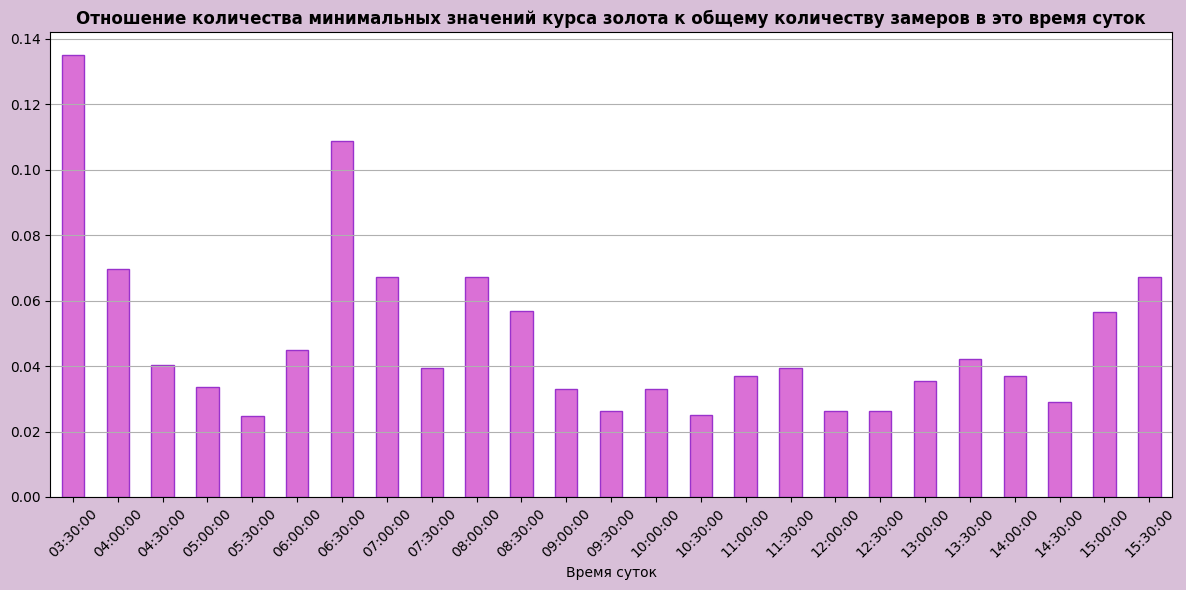

In [ ]:
plt.figure(figsize=(12, 6), facecolor='thistle')
min_to_total_gold_ratio.plot(kind='bar', color='orchid', edgecolor='darkorchid')
plt.title('Отношение количества минимальных значений курса золота к общему количеству замеров в это время суток', fontweight='bold')
plt.xlabel('Время суток')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Из графиков выше можем сделать вывод, что чаще всего золото достигает своего минимума и максимума в цене за день именно в 3:30.

# Перейдем к датасету с ценами из стима

Прочитаем данные из csv файла, полученного на предыдущем этапе:

In [ ]:
steam_market_prices = pd.read_csv('/content/steam_market_prices.csv')
steam_market_prices

,instrument,price_usd,timestamp
0,Chroma 3 Case,0.28,1646258400
1,Chroma 3 Case,0.28,1646344800
2,Chroma 3 Case,0.28,1646431200
3,Chroma 3 Case,0.28,1646517600
4,Chroma 3 Case,0.28,1646604000
...,...,...,...
1732,Chroma 3 Case,4.02,1740819600
1733,Chroma 3 Case,3.94,1740823200
1734,Chroma 3 Case,4.04,1740826800
1735,Chroma 3 Case,4.01,1740830400


In [ ]:
steam_market_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instrument  1737 non-null   object 
 1   price_usd   1737 non-null   float64
 2   timestamp   1737 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 40.8+ KB


В датасете нет пропусков.
*   instrument - короткое имя инструмента
*   price_usd - исторические данные о стоимости предмета в стиме в долларах
*   timestamp - временная метка в формате UNIX

Переведем временную метку из UNIX формата в удобочитаемый вид и также добавим столбец с датой:


In [ ]:
steam_market_prices['datetime'] = pd.to_datetime(steam_market_prices['timestamp'], unit='s')
steam_market_prices['date'] = steam_market_prices['datetime'].dt.date
steam_market_prices['date'] = pd.to_datetime(steam_market_prices['date'])
steam_market_prices.head()

,instrument,price_usd,timestamp,datetime,date
0,Chroma 3 Case,0.28,1646258400,2022-03-02 22:00:00,2022-03-02
1,Chroma 3 Case,0.28,1646344800,2022-03-03 22:00:00,2022-03-03
2,Chroma 3 Case,0.28,1646431200,2022-03-04 22:00:00,2022-03-04
3,Chroma 3 Case,0.28,1646517600,2022-03-05 22:00:00,2022-03-05
4,Chroma 3 Case,0.28,1646604000,2022-03-06 22:00:00,2022-03-06


Уберем столбцы, которые не несут полезной информации, и переименуем полезные:

In [ ]:
steam_market_prices.drop(columns=['instrument', 'timestamp'], inplace=True)
steam_market_prices.rename(columns={'price_usd': 'steam_price_usd'}, inplace=True)
steam_market_prices.head()

,steam_price_usd,datetime,date
0,0.28,2022-03-02 22:00:00,2022-03-02
1,0.28,2022-03-03 22:00:00,2022-03-03
2,0.28,2022-03-04 22:00:00,2022-03-04
3,0.28,2022-03-05 22:00:00,2022-03-05
4,0.28,2022-03-06 22:00:00,2022-03-06


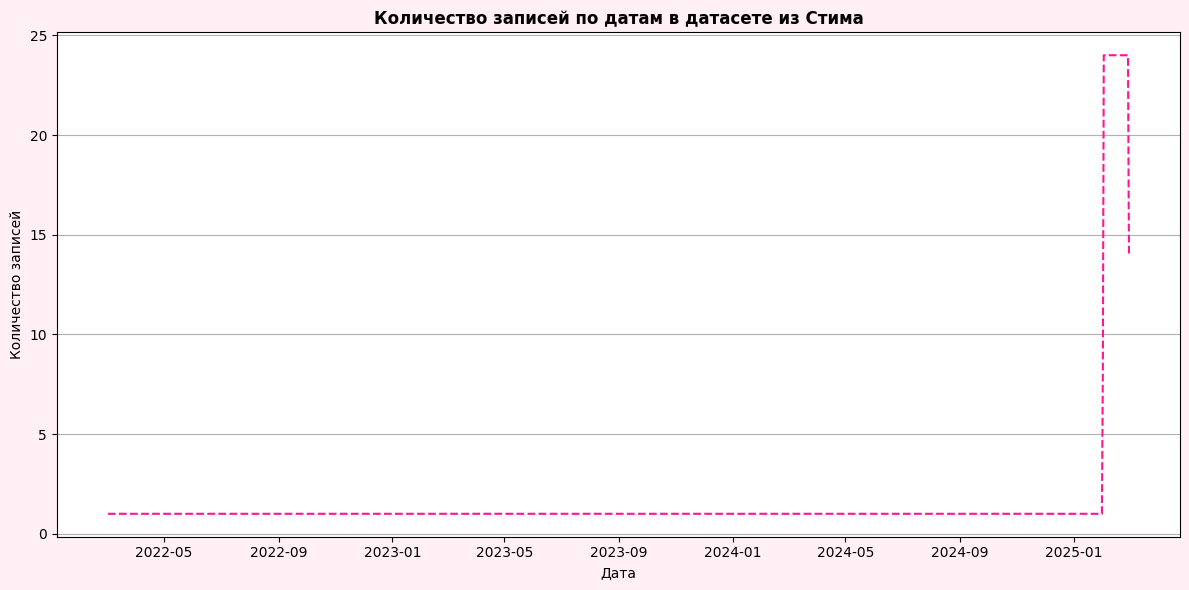

In [ ]:
daily_counts = steam_market_prices.groupby('date').size().reset_index(name='count')

plt.figure(figsize=(12, 6), facecolor='lavenderblush')
plt.plot(daily_counts['date'], daily_counts['count'], linestyle='--', color='deeppink')
plt.title('Количество записей по датам в датасете из Стима', fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Количество записей')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

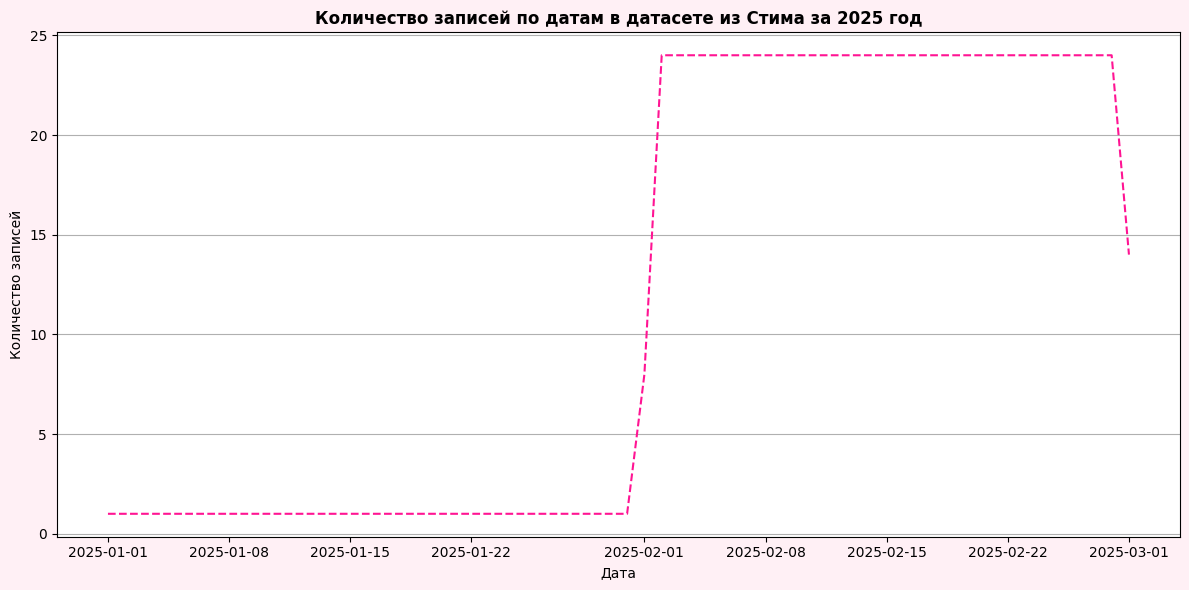

In [ ]:
data_2025 = steam_market_prices[steam_market_prices['date'] >= '2025-01-01']

daily_counts_2025 = data_2025.groupby('date').size().reset_index(name='count')

plt.figure(figsize=(12, 6), facecolor='lavenderblush')
plt.plot(daily_counts_2025['date'], daily_counts_2025['count'], linestyle='--', color='deeppink')
plt.title('Количество записей по датам в датасете из Стима за 2025 год', fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Количество записей')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

В датасете содержатся данные о стоимости предмета в стиме с 2022-03-02 по 2025-03-01(до февраля 25 года - выгрузка раз в день, начиная с февраля - раз в час). 1 марта 2025 года записей не 24, тк выгрузка делалась в этот день в середине дня.

Визуализируем данные:

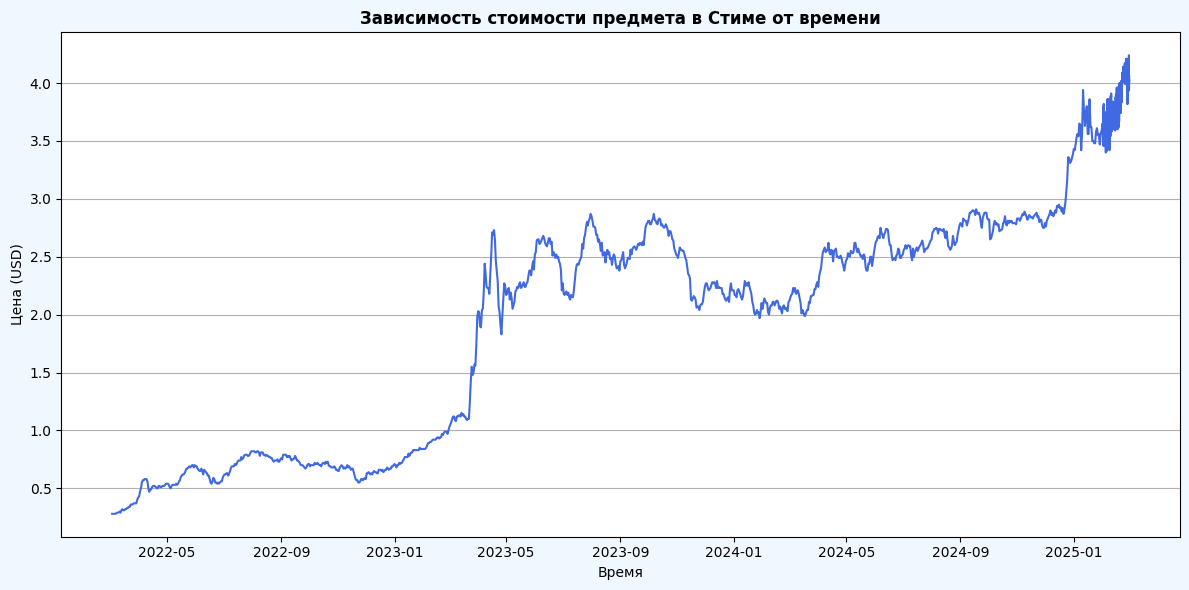

In [ ]:
plt.figure(figsize=(12, 6), facecolor='aliceblue')
plt.plot(steam_market_prices['datetime'], steam_market_prices['steam_price_usd'], color='royalblue')
plt.title('Зависимость стоимости предмета в Стиме от времени', fontweight='bold')
plt.xlabel('Время')
plt.ylabel('Цена (USD)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Соединяем датасеты

Смерджим датасеты по времени Будем использовать outer join, чтобы не потерять данные:

In [ ]:
df = pd.merge(cny_gold_prices, steam_market_prices, left_on='datetime', right_on='datetime', how='outer')
df

,cny_price_rub,gold_price_rub,datetime,date_x,time,steam_price_usd,date_y
0,NaN,NaN,2022-03-02 22:00:00,NaT,NaN,0.28,2022-03-02
1,17.6900,6740.00,2022-03-03 07:00:00,2022-03-03,07:00:00,NaN,NaT
2,18.1499,6899.99,2022-03-03 07:30:00,2022-03-03,07:30:00,NaN,NaT
3,18.7400,6999.00,2022-03-03 08:00:00,2022-03-03,08:00:00,NaN,NaT
4,18.6800,7056.40,2022-03-03 08:30:00,2022-03-03,08:30:00,NaN,NaT
...,...,...,...,...,...,...,...
18600,NaN,NaN,2025-03-01 09:00:00,NaT,NaN,4.02,2025-03-01
18601,NaN,NaN,2025-03-01 10:00:00,NaT,NaN,3.94,2025-03-01
18602,NaN,NaN,2025-03-01 11:00:00,NaT,NaN,4.04,2025-03-01
18603,NaN,NaN,2025-03-01 12:00:00,NaT,NaN,4.01,2025-03-01


Удалим ненужные столбцы, также поменяем порядок столбцов:

In [ ]:
df.drop(columns=['date_x', 'date_y', 'time'], inplace=True)
df = df[['cny_price_rub', 'gold_price_rub', 'steam_price_usd', 'datetime']]
df.head()

,cny_price_rub,gold_price_rub,steam_price_usd,datetime
0,NaN,NaN,0.28,2022-03-02 22:00:00
1,17.6900,6740.00,NaN,2022-03-03 07:00:00
2,18.1499,6899.99,NaN,2022-03-03 07:30:00
3,18.7400,6999.00,NaN,2022-03-03 08:00:00
4,18.6800,7056.40,NaN,2022-03-03 08:30:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18605 entries, 0 to 18604
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cny_price_rub    17048 non-null  float64       
 1   gold_price_rub   16957 non-null  float64       
 2   steam_price_usd  1737 non-null   float64       
 3   datetime         18605 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 581.5 KB


В полученнном датасете довольно много пропусков, это связано с тем, что данные выгружались в датасеты с разной частотой и за разное время.
Преобразуем датасет: будем брать средние цены за каждый день:
(Дополнительно нужно учитывать, что в выходные биржа не работает, поэтому за эти дни данных о стоимости юаня и золота не будет.)

In [ ]:
df['date'] = df['datetime'].dt.date

daily_prices = df.groupby('date').agg({
    'cny_price_rub': 'mean',
    'gold_price_rub': 'mean',
    'steam_price_usd': 'mean'
}).reset_index()

daily_prices

<ipython-input-346-6c861c14254d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['datetime'].dt.date


,date,cny_price_rub,gold_price_rub,steam_price_usd
0,2022-03-02,NaN,NaN,0.280000
1,2022-03-03,18.684322,6997.646471,0.280000
2,2022-03-04,20.036250,6875.665556,0.280000
3,2022-03-05,NaN,NaN,0.280000
4,2022-03-06,NaN,NaN,0.280000
...,...,...,...,...
1091,2025-02-25,11.772474,8203.678947,4.117083
1092,2025-02-26,11.782711,8125.452632,4.137083
1093,2025-02-27,11.959132,8171.578947,4.001250
1094,2025-02-28,12.106553,8182.157895,4.117083


Как и предпологалась, нет данных в столбцах 'cny_price_rub' и 'gold_price_rub' за выходные дни.

Удалим строки за 2022-03-02 и 2025-03-01, чтобы даты начала и конца выгрузок совпадали:

In [ ]:
daily_prices['date'] = pd.to_datetime(daily_prices['date'])
daily_prices.drop(index=[daily_prices.index[0], daily_prices.index[-1]], inplace=True)
daily_prices

,date,cny_price_rub,gold_price_rub,steam_price_usd
1,2022-03-03,18.684322,6997.646471,0.280000
2,2022-03-04,20.036250,6875.665556,0.280000
3,2022-03-05,NaN,NaN,0.280000
4,2022-03-06,NaN,NaN,0.280000
5,2022-03-07,NaN,NaN,0.290000
...,...,...,...,...
1090,2025-02-24,12.051263,8352.026316,4.105417
1091,2025-02-25,11.772474,8203.678947,4.117083
1092,2025-02-26,11.782711,8125.452632,4.137083
1093,2025-02-27,11.959132,8171.578947,4.001250


Итоговый датасет содержит данные с 2022-03-03 по 2025-02-28

In [ ]:
daily_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 1 to 1094
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1094 non-null   datetime64[ns]
 1   cny_price_rub    759 non-null    float64       
 2   gold_price_rub   759 non-null    float64       
 3   steam_price_usd  1094 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 34.3 KB


Заполнение пропусков в нашей задаче не требуется

Посмотрим на корреляцию:

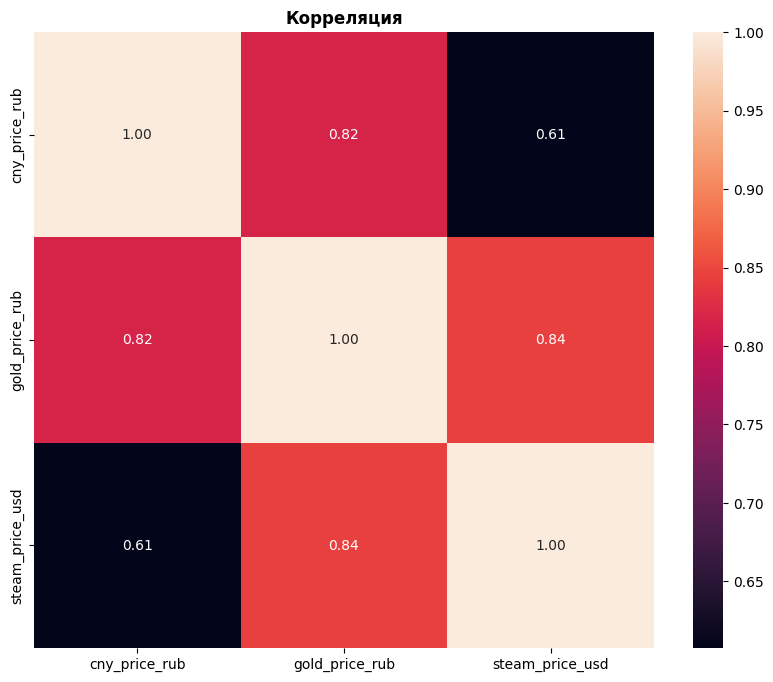

In [ ]:
corr = daily_prices[['cny_price_rub', 'gold_price_rub', 'steam_price_usd']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Корреляция', fontweight='bold')
plt.show()

Сильнее всего коррелируют между собой курсы золота и предмета из стима, а также золота и юаня. Посмотрим на них еще раз:

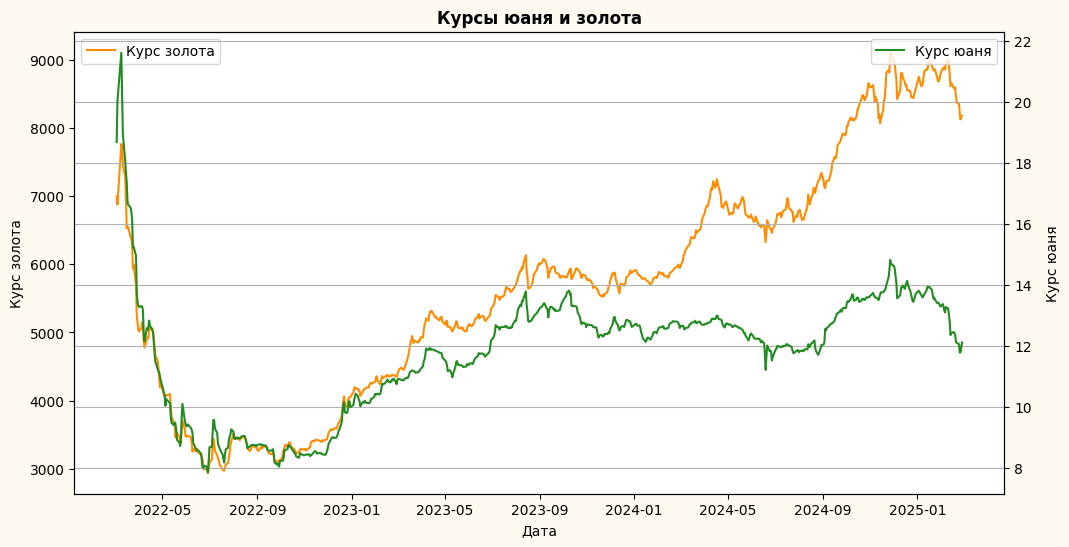

In [ ]:
plt.figure(figsize=(12, 6), facecolor='floralwhite')

sns.lineplot(data=daily_prices, x='date', y='gold_price_rub', color='darkorange', label='Курс золота')
plt.title('Курсы юаня и золота', fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Курс золота')
plt.tick_params(axis='y')

ax2 = plt.gca().twinx()
sns.lineplot(data=daily_prices, x='date', y='cny_price_rub', color='forestgreen', label='Курс юаня', ax=ax2)
ax2.set_ylabel('Курс юаня', labelpad=10)
ax2.tick_params(axis='y')
plt.grid()
plt.show()

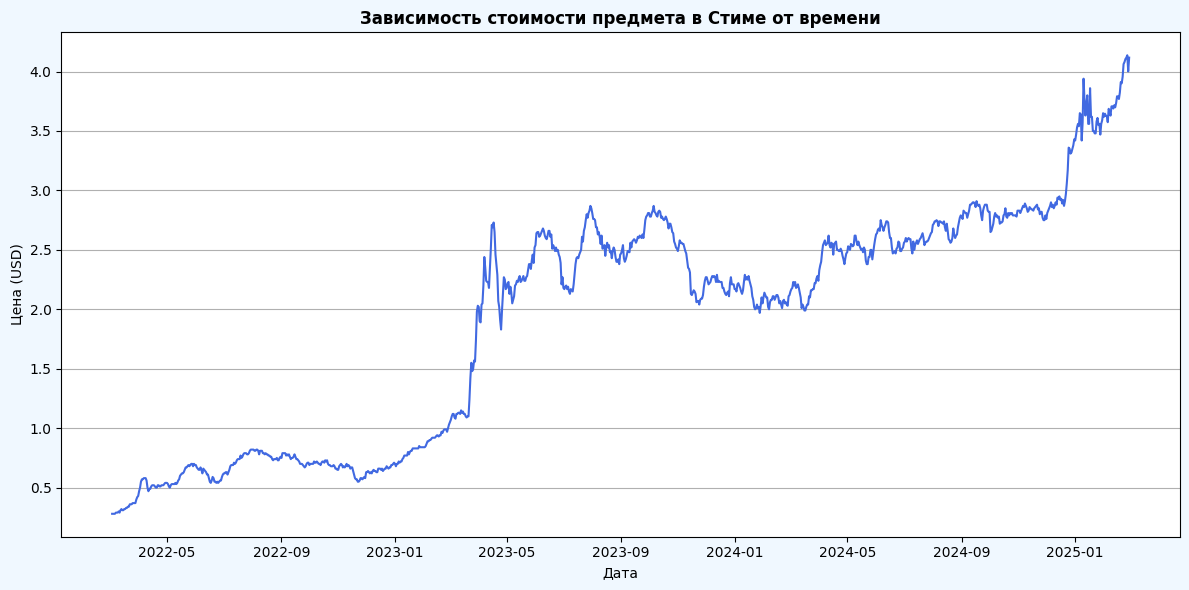

In [ ]:
plt.figure(figsize=(12, 6), facecolor='aliceblue')
plt.plot(daily_prices['date'], daily_prices['steam_price_usd'], color='royalblue')
plt.title('Зависимость стоимости предмета в Стиме от времени', fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Заполнение пропусков в нашей задаче не требуется, но если все-таки пригодится, то:

In [ ]:
new_daily_prices = daily_prices.copy()
new_daily_prices['cny_price_rub'] = new_daily_prices['cny_price_rub'].fillna(method='ffill')
new_daily_prices['gold_price_rub'] = new_daily_prices['gold_price_rub'].fillna(method='ffill')
new_daily_prices.head(20)

<ipython-input-367-7c0dbd942639>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_daily_prices['cny_price_rub'] = new_daily_prices['cny_price_rub'].fillna(method='ffill')
<ipython-input-367-7c0dbd942639>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_daily_prices['gold_price_rub'] = new_daily_prices['gold_price_rub'].fillna(method='ffill')


,date,cny_price_rub,gold_price_rub,steam_price_usd
1,2022-03-03,18.684322,6997.646471,0.28
2,2022-03-04,20.036250,6875.665556,0.28
3,2022-03-05,20.036250,6875.665556,0.28
4,2022-03-06,20.036250,6875.665556,0.28
5,2022-03-07,20.036250,6875.665556,0.29
6,2022-03-08,20.036250,6875.665556,0.29
7,2022-03-09,21.618672,7766.094444,0.29
8,2022-03-10,20.181278,7727.493333,0.30
9,2022-03-11,18.934244,7453.730000,0.29
10,2022-03-12,18.934244,7453.730000,0.31


In [ ]:
new_daily_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 1 to 1094
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1094 non-null   datetime64[ns]
 1   cny_price_rub    1094 non-null   float64       
 2   gold_price_rub   1094 non-null   float64       
 3   steam_price_usd  1094 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 34.3 KB


In [ ]:
import datetime
import requests
import pandas as pd

start_seconds = int(datetime.datetime(2022, 3, 3).timestamp())
end_seconds = int(datetime.datetime.now().timestamp())

resp = requests.get(
    f'https://query1.finance.yahoo.com/v8/finance/chart/RUB=X',
    headers={'User-Agent': 'zip'},
    params={'period1': start_seconds, 'period2': end_seconds, 'interval': '1d'},
    timeout=5
).json()
resp = resp['chart']['result'][0]
df = pd.DataFrame({
    'date': [datetime.datetime.fromtimestamp(d).date() for d in resp['timestamp']],
    'closing_price': resp['indicators']['adjclose'][0]['adjclose']
})

print(df)

           date  closing_price
0    2022-03-03     102.714996
1    2022-03-04     109.464996
2    2022-03-07     108.845100
3    2022-03-08     138.965103
4    2022-03-09     129.964996
..          ...            ...
779  2025-02-26      86.595695
780  2025-02-27      86.820770
781  2025-02-28      87.698212
782  2025-03-03      87.481758
783  2025-03-04      88.997002

[784 rows x 2 columns]
